In [3]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tqdm import tqdm
from random import shuffle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras import optimizers
import sklearn
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


Using TensorFlow backend.


In [4]:
TRAIN_DIR='/home/rahulchakwate/My_tensorflow/DataSets/cats_and_dogs_2/train_mini'
IMG_SIZE=50
LR=1e-3
MODEL_NAME='cat-dog-convnet'

def create_label(image_name):
    word_label=image_name.split('.')[-3]
    if word_label=='cat':
        return np.array([1,0])
    elif word_label=='dog':
        return np.array([0,1])


In [5]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path=os.path.join(TRAIN_DIR,img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img_data),create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data



In [6]:
train_data=create_train_data()

100%|██████████| 1001/1001 [00:00<00:00, 1279.21it/s]


In [7]:
train=train_data
X_train=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train=np.array([i[1] for i in train])
print(X_train.shape)
print(y_train.shape)

(1001, 50, 50, 1)
(1001, 2)


In [13]:
def build_classifier(optimizer):
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='random_normal',input_shape=(50,50,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model=KerasClassifier(build_fn=build_classifier)
parameters={'batch_size':[4],
            'epochs':[3,6],
            'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                        scoring='accuracy',
                         cv=None)

grid_search=grid_search.fit(X_train,y_train,verbose=1)
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_


Epoch 1/3
667/667 [==============================] - 12s 17ms/step - loss: 7.9994 - acc: 0.5022
Epoch 2/3
667/667 [==============================] - 11s 17ms/step - loss: 8.0228 - acc: 0.5022
Epoch 3/3
667/667 [==============================] - 13s 20ms/step - loss: 8.0228 - acc: 0.5022


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [45]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])


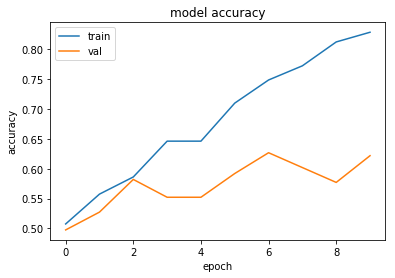

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

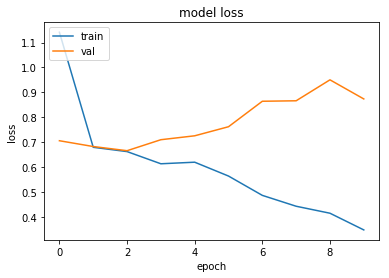

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
keras.callbacks.TensorBoard(log_dir='/tmp/log')